In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('50_startups.csv')
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
df.ndim

2

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Data Cleaning

In [7]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [8]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## EDA on Dataset

<AxesSubplot:xlabel='Profit'>

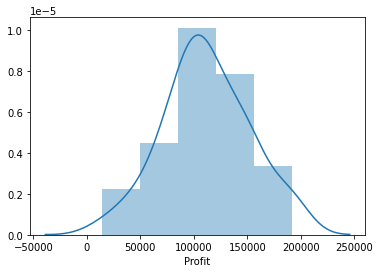

In [11]:
#Histgram on Profit
sns.distplot(df['Profit'],bins=5,kde=True)

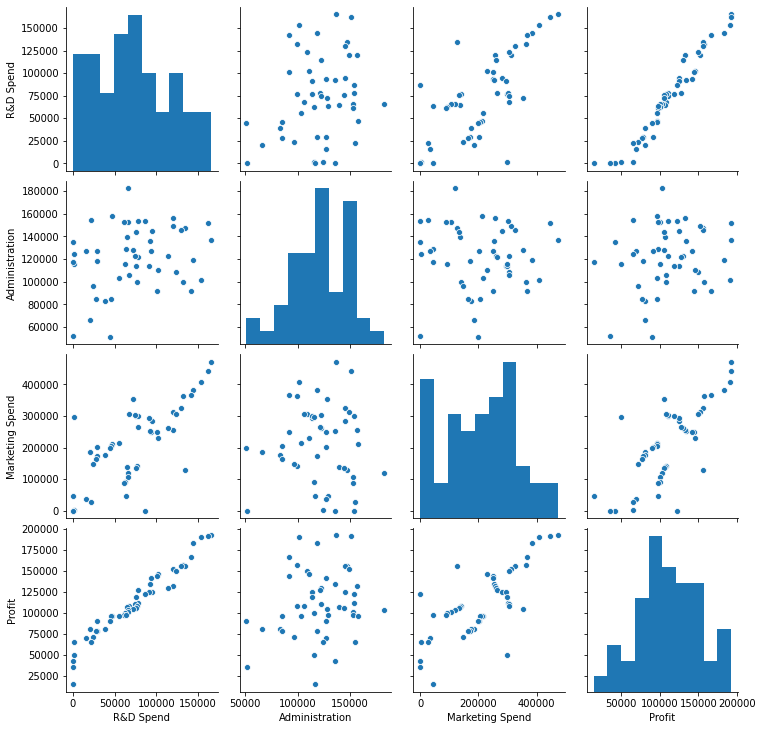

In [12]:
#Correlation  chart on different variables for comparision 
# Profit Vs R & Spend is very linear and almost same for Marketing spend
# Profit spend vs Administration distribution is very scattered 
sns.pairplot(df)

<AxesSubplot:xlabel='State', ylabel='Profit'>

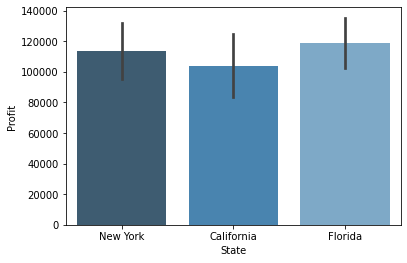

In [13]:
# profit split in State level - Looks Florida has the maximum Profit
sns.barplot(x='State',y='Profit',data=df, palette="Blues_d")
#sns.lineplot(x='State',y='Profit',data=dataset)

<AxesSubplot:>

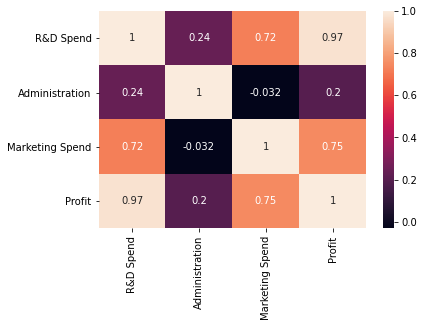

In [14]:
#gives positive & negative relation between categories
sns.heatmap(df.corr(), annot=True)

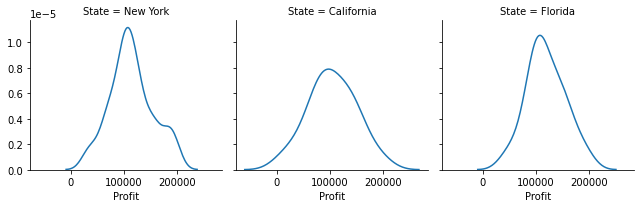

In [15]:
# spread of profit against state 
g=sns.FacetGrid(df, col='State')
g=g.map(sns.kdeplot,'Profit')

In [16]:
#Separating the Independent and the dependent variables
X = df.iloc[ : , :-1].values
y = df.iloc[ : , 4].values

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

# Country column
columnTransformer = ColumnTransformer([('State', OneHotEncoder(), [3])],     remainder='passthrough')
X=columnTransformer.fit_transform(X)

# Here index column 3 has categorical variable

In [18]:
# Avoiding the dummy variable trap
X = X[:, 1:]
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

In [19]:
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

## Data Partitioning

In [20]:
#Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [21]:
X_train,y_train

(array([[1.0, 0.0, 55493.95, 103057.49, 214634.81],
        [0.0, 1.0, 46014.02, 85047.44, 205517.64],
        [1.0, 0.0, 75328.87, 144135.98, 134050.07],
        [0.0, 0.0, 46426.07, 157693.92, 210797.67],
        [1.0, 0.0, 91749.16, 114175.79, 294919.57],
        [1.0, 0.0, 130298.13, 145530.06, 323876.68],
        [1.0, 0.0, 119943.24, 156547.42, 256512.92],
        [0.0, 1.0, 1000.23, 124153.04, 1903.93],
        [0.0, 1.0, 542.05, 51743.15, 0.0],
        [0.0, 1.0, 65605.48, 153032.06, 107138.38],
        [0.0, 1.0, 114523.61, 122616.84, 261776.23],
        [1.0, 0.0, 61994.48, 115641.28, 91131.24],
        [0.0, 0.0, 63408.86, 129219.61, 46085.25],
        [0.0, 0.0, 78013.11, 121597.55, 264346.06],
        [0.0, 0.0, 23640.93, 96189.63, 148001.11],
        [0.0, 0.0, 76253.86, 113867.3, 298664.47],
        [0.0, 1.0, 15505.73, 127382.3, 35534.17],
        [0.0, 1.0, 120542.52, 148718.95, 311613.29],
        [0.0, 0.0, 91992.39, 135495.07, 252664.93],
        [0.0, 0.0, 64664.71

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
#Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(X_train_scaled,y_train)

#print('Coefficients: \n', lr.coef_)
linearregression.score(X_train_scaled, y_train)

#predicting the test set results
y_pred = linearregression.predict(X_test)

print(linearregression.score(X_train_scaled, y_train))
print(linearregression.score(X_test_scaled, y_test))

0.9501847627493607
0.9347068473282424


In [24]:
import statsmodels.api as sm
# (bydefault it's not take constant(thetas 0 ,we have to put theta_0 * X0 = 1
# that's why we are creating col. of 1's and trying to put in the starting of X)
X_one = np.append(arr  = np.ones((40,1)).astype(int),values = X_train_scaled, axis = 1)# we are adding 1 extra col. in the starting  of X
print(X_one)

#np.append(values = X, np.ones((50,1)), axis = 1) # it will add col. at the last of X dataset

[[1.         1.         0.         0.33561668 0.48655174 0.45494286]
 [1.         0.         1.         0.2782839  0.3173015  0.43561799]
 [1.         1.         0.         0.45557444 0.87258866 0.28413435]
 [1.         0.         0.         0.2807759  1.         0.44680961]
 [1.         1.         0.         0.55488118 0.59103645 0.62511553]
 [1.         1.         0.         0.7880179  0.88568959 0.68649342]
 [1.         1.         0.         0.72539353 0.98922572 0.54370828]
 [1.         0.         1.         0.0060492  0.6847981  0.0040356 ]
 [1.         0.         1.         0.00327821 0.00432296 0.        ]
 [1.         0.         1.         0.39676926 0.95618996 0.22709197]
 [1.         0.         1.         0.69261666 0.67036159 0.55486446]
 [1.         1.         0.         0.37493063 0.60480846 0.19316302]
 [1.         0.         0.         0.38348453 0.73241142 0.09768292]
 [1.         0.         0.         0.47180821 0.66078277 0.56031151]
 [1.         0.         0.        

In [25]:
X_opt =X_one[:, [0,1,2,3,4,5]].astype(float)
regressor_OLS = sm.OLS(y_train,X_train_scaled)
regressor_OLS=regressor_OLS.fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              388.6
Date:                Sat, 30 Jan 2021   Prob (F-statistic):                    1.29e-29
Time:                        22:55:47   Log-Likelihood:                         -442.76
No. Observations:                  40   AIC:                                      895.5
Df Residuals:                      35   BIC:                                      904.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4085.8841   6759.115      0.604      0.549   -9635.849    1.78e+04
x2          9801.4701   5906.601      1.659      0.106   -2189.568    2.18e+04
x3          1.116e+05   1.51e+04      7.405      0.000     8.1e+04    1.42e+05
x4          4.832e+04   7532.296      6.416      0.000     3.3e+04    6.36e+04
x5          4.733e+04   1.42e+04      3.331      0.002    1.85e+04    7.62e+04
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.453
Skew:                          -0.186   Prob(JB):                        0.797
Kurtosis:                       2.634   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
regressor_OLS.predict(X_test_scaled)

array([120173.41820925, 111395.07309572, 122792.74160833,  54592.61215304,
       171214.14127973, 128679.50397181,  48701.77072263, 105970.46195864,
       116926.6116647 , 154944.89490245])

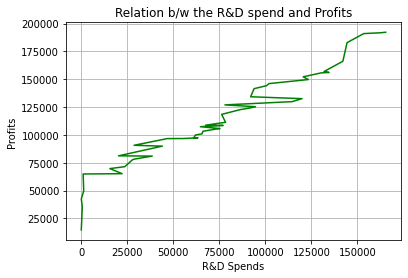

In [27]:
plt.plot(df.iloc[:,0], df.iloc[:, 4], color = 'green')
plt.xlabel('R&D Spends')
plt.ylabel('Profits')
plt.title('Relation b/w the R&D spend and Profits')
plt.grid()

ValueError: x and y must be the same size

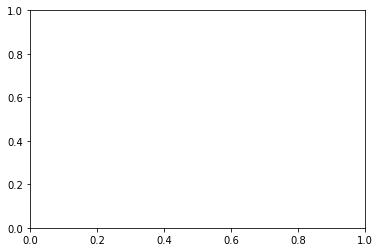

In [28]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor_OLS.predict(X_train), color = 'blue')
plt.title('R&D spend vs Profit (Training set)')
plt.xlabel('R&D spend')
plt.ylabel('Profit')
plt.grid(color='gold', linestyle='-.', linewidth=0.7)
plt.show()